<a href="https://colab.research.google.com/github/Asermoh22/SongPopularity/blob/main/MileStoneOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv('/content/SongPopularity.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   object 
 1   Album                6191 non-null   object 
 2   Album Release Date   6191 non-null   object 
 3   Artist Names         6191 non-null   object 
 4   Artist(s) Genres     6191 non-null   object 
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   object 
 9   Song Image           6191 non-null   object 
 10  Spotify URI          6191 non-null   object 
 11  Popularity           6191 non-null   int64  
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [ ]:
df.describe()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
count,6191.000000,6191.000000,6.191000e+03,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000
mean,1987.848167,48.320627,2.246265e+05,54.117913,0.300063,0.617710,0.596881,0.045992,0.180755,-8.718824,0.072038,119.009198,0.596321,5.240833,0.705863,3.941043
std,20.354870,29.185349,6.436037e+04,21.511330,0.291133,0.156799,0.205486,0.170713,0.150009,3.774887,0.079253,28.224417,0.242167,3.581859,0.455690,0.317370
min,1946.000000,1.000000,5.180000e+04,0.000000,0.000004,0.000000,0.012000,0.000000,0.015000,-37.841000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1971.000000,23.000000,1.817595e+05,42.000000,0.049250,0.520500,0.455500,0.000000,0.087200,-11.122500,0.032300,97.851000,0.404000,2.000000,0.000000,4.000000
50%,1988.000000,47.000000,2.207340e+05,58.000000,0.195000,0.633000,0.615000,0.000004,0.123000,-8.128000,0.041600,117.907000,0.613000,5.000000,1.000000,4.000000
75%,2005.000000,74.000000,2.571130e+05,70.000000,0.511500,0.728000,0.758000,0.000523,0.232000,-5.787500,0.068800,134.905000,0.804000,8.000000,1.000000,4.000000
max,2022.000000,100.000000,1.561133e+06,94.000000,0.995000,0.988000,0.997000,0.972000,0.985000,-0.810000,0.911000,232.473000,0.991000,11.000000,1.000000,5.000000


In [ ]:
df.head()


,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,...,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,...,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,...,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,...,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4


In [ ]:
print(df.isnull().sum())


Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


In [ ]:
PopMean=df['Popularity'].mean()

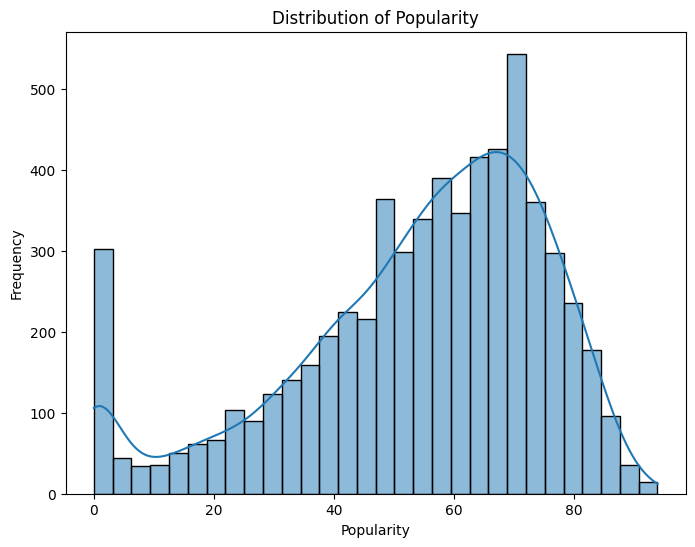

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
year_only_checker = df["Album Release Date"].str.len() == 4
df.loc[year_only_checker, "Album Release Date"] = "01/01/" + df.loc[year_only_checker, "Album Release Date"]
df["Album Release Date"] = pd.to_datetime(df["Album Release Date"], errors='coerce')
df["Album Release Date"]=df["Album Release Date"]
df["Album Release Date"]=df["Album Release Date"].dt.year

In [ ]:
df['Artist(s) Genres'].head(40)


0     ['country dawn', 'contemporary country', 'coun...
1     ['hip pop', 'contemporary r&b', 'urban contemp...
2                                     ['bubblegum pop']
3     ['adult standards', 'easy listening', 'movie t...
4                                           ['karaoke']
5                                ['glam metal', 'rock']
6             ['glam metal', 'album rock', 'hard rock']
7     ['canadian singer-songwriter', 'neo mellow', '...
8                         ['pop punk', 'neon pop punk']
9                                      ['new wave pop']
10                                              ['pop']
11    ['lilith', "women's music", 'singer-songwriter...
12    ['art rock', 'hard rock', 'rock', 'progressive...
13                                    ['northern soul']
14                            ['music hall', 'skiffle']
15    ['folk rock', 'singer-songwriter', 'soft rock'...
16    ['glam metal', 'country rock', 'hard rock', 'a...
17    ['hip pop', 'dance pop', 'urban contempora

In [ ]:
df['Artist(s) Genres'] = df['Artist(s) Genres'].replace(r'^\[\s*\]$', np.nan, regex=True)
df['Artist(s) Genres'].fillna(df['Artist(s) Genres'].mode()[0], inplace=True)
artist_genres_mode = df['Artist(s) Genres'].mode()[0]
df['Album Release Date'].fillna(df['Album Release Date'].mean(), inplace=True)

In [ ]:
df['Artist(s) Genres'].head(40)

0     ['country dawn', 'contemporary country', 'coun...
1     ['hip pop', 'contemporary r&b', 'urban contemp...
2                                     ['bubblegum pop']
3     ['adult standards', 'easy listening', 'movie t...
4                                           ['karaoke']
5                                ['glam metal', 'rock']
6             ['glam metal', 'album rock', 'hard rock']
7     ['canadian singer-songwriter', 'neo mellow', '...
8                         ['pop punk', 'neon pop punk']
9                                      ['new wave pop']
10                                              ['pop']
11    ['lilith', "women's music", 'singer-songwriter...
12    ['art rock', 'hard rock', 'rock', 'progressive...
13                                    ['northern soul']
14                            ['music hall', 'skiffle']
15    ['folk rock', 'singer-songwriter', 'soft rock'...
16    ['glam metal', 'country rock', 'hard rock', 'a...
17    ['hip pop', 'dance pop', 'urban contempora

In [ ]:
mode_values = {}

for column_name in df.columns:
    if df[column_name].dtype == 'object':
        unique_cat = len(df[column_name].unique())
        print(f"Feature '{column_name}' has '{unique_cat}' unique categories ")

        # Calculate mode value and store in the dictionary
        mode_val = df[column_name].mode()[0]  # Mode value
        mode_values[column_name] = mode_val



Feature 'Song' has '5694' unique categories 
Feature 'Album' has '4520' unique categories 
Feature 'Artist Names' has '3104' unique categories 
Feature 'Artist(s) Genres' has '2230' unique categories 
Feature 'Spotify Link' has '5918' unique categories 
Feature 'Song Image' has '4666' unique categories 
Feature 'Spotify URI' has '5918' unique categories 


In [ ]:
label_encoder = LabelEncoder()
encodded_values = {}
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
    encodded_values[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   int64  
 1   Album                6191 non-null   int64  
 2   Album Release Date   6191 non-null   float64
 3   Artist Names         6191 non-null   int64  
 4   Artist(s) Genres     6191 non-null   int64  
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   int64  
 9   Song Image           6191 non-null   int64  
 10  Spotify URI          6191 non-null   int64  
 11  Popularity           6191 non-null   int64  
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [ ]:
def find_columns_outside_0_and_1(df):
    columns_outside_0_and_1 = {}
    for column in df.columns:
        min_value = df[column].min()
        max_value = df[column].max()
        if min_value < 0 or max_value > 1:
            columns_outside_0_and_1[column] = {'min': min_value, 'max': max_value}
    return columns_outside_0_and_1

In [ ]:
X_scaled_features_info = find_columns_outside_0_and_1(df)
from sklearn.preprocessing import MinMaxScaler
X_scaled_features_info = find_columns_outside_0_and_1(df)
scaler = MinMaxScaler()
for column, info in X_scaled_features_info.items():
    min_value = info['min']
    max_value = info['max']
    df[column] = scaler.fit_transform(df[[column]])
print(X_scaled_features_info)


{'Song': {'min': 0, 'max': 5693}, 'Album': {'min': 0, 'max': 4519}, 'Album Release Date': {'min': 1900.0, 'max': 2023.0}, 'Artist Names': {'min': 0, 'max': 3103}, 'Artist(s) Genres': {'min': 0, 'max': 2229}, 'Hot100 Ranking Year': {'min': 1946, 'max': 2022}, 'Hot100 Rank': {'min': 1, 'max': 100}, 'Song Length(ms)': {'min': 51800, 'max': 1561133}, 'Spotify Link': {'min': 0, 'max': 5917}, 'Song Image': {'min': 0, 'max': 4665}, 'Spotify URI': {'min': 0, 'max': 5917}, 'Popularity': {'min': 0, 'max': 94}, 'Loudness': {'min': -37.841, 'max': -0.81}, 'Tempo': {'min': 0.0, 'max': 232.473}, 'Key': {'min': 0, 'max': 11}, 'Time Signature': {'min': 0, 'max': 5}}


In [ ]:
df.describe()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
count,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,...,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000
mean,0.500455,0.496405,0.777275,0.498544,0.495915,0.550634,0.477986,0.114505,0.498472,0.500417,...,0.596881,0.045992,0.180755,0.786427,0.072038,0.511927,0.596321,0.476439,0.705863,0.788209
std,0.288861,0.289865,0.148759,0.290171,0.279766,0.267827,0.294802,0.042642,0.288917,0.288271,...,0.205486,0.170713,0.150009,0.101939,0.079253,0.121409,0.242167,0.325624,0.455690,0.063474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012000,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251098,0.246183,0.666667,0.250725,0.248093,0.328947,0.222222,0.086104,0.248352,0.254555,...,0.455500,0.000000,0.087200,0.721517,0.032300,0.420913,0.404000,0.181818,0.000000,0.800000
50%,0.500439,0.497234,0.796748,0.499194,0.499327,0.552632,0.464646,0.111926,0.498394,0.496034,...,0.615000,0.000004,0.123000,0.802382,0.041600,0.507186,0.613000,0.454545,1.000000,0.800000
75%,0.750132,0.749613,0.902439,0.751853,0.743383,0.776316,0.737374,0.136029,0.748606,0.749732,...,0.758000,0.000523,0.232000,0.865586,0.068800,0.580304,0.804000,0.727273,1.000000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997000,0.972000,0.985000,1.000000,0.911000,1.000000,0.991000,1.000000,1.000000,1.000000


In [ ]:
def find_outliers_iqr(df, column_name='column_name', threshold=1.5):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    bounds_dict = {}
    lower = q1 - threshold * iqr
    upper = q3 + threshold * iqr
    outliers_indices = df.index[(df[column_name] < lower) | (df[column_name] > upper)]
    bounds_dict[column_name] = {'upper': upper, 'lower': lower,'mean':df[column_name].mean()}
    return outliers_indices, lower, upper,bounds_dict

def count_outliers_iqr(df):
    for column in df.columns:
        outlier_indices, lower, upper,_ = find_outliers_iqr(df, column)
        if len(outlier_indices) > 0:
            outlier_count = len(outlier_indices)
            print(f"Number of outliers in column '{column}': {outlier_count}")
            print(f"IQR Lower Bound in column '{column}': {lower}")
            print(f"IQR Upper Bound in column '{column}': {upper}")
exclude_columns = []
def replace_outliers_iqr(df, threshold=1.5):
    for column in df.columns:
        if column in exclude_columns:
            continue
        outlier_indices, lower, upper,_ = find_outliers_iqr(df, column)
        column_mean = df[column].mean()
        for i in outlier_indices:
            if df.loc[i, column] > upper:
                df.loc[i, column] = upper
            elif df.loc[i, column] < lower:
                df.loc[i, column] = lower
def replace_outliers_with_mean(df, column_name, lower_bound, upper_bound):
    mean_value = df[column_name].mean()
    df[column_name] = np.where((df[column_name] > upper_bound) | (df[column_name] < lower_bound), mean_value, df[column_name])

# Detect and count outliers using IQR method
count_outliers_iqr(df)

# Replace outliers using IQR method
replace_outliers_iqr(df)


Number of outliers in column 'Album Release Date': 3
IQR Lower Bound in column 'Album Release Date': 0.3130081300813039
IQR Upper Bound in column 'Album Release Date': 1.2560975609756078
Number of outliers in column 'Song Length(ms)': 117
IQR Lower Bound in column 'Song Length(ms)': 0.011216378360507609
IQR Upper Bound in column 'Song Length(ms)': 0.21091651080311632
Number of outliers in column 'Danceability': 41
IQR Lower Bound in column 'Danceability': 0.20924999999999994
IQR Upper Bound in column 'Danceability': 1.03925
Number of outliers in column 'Instrumentalness': 1296
IQR Lower Bound in column 'Instrumentalness': -0.0007845
IQR Upper Bound in column 'Instrumentalness': 0.0013075
Number of outliers in column 'Liveness': 348
IQR Lower Bound in column 'Liveness': -0.13
IQR Upper Bound in column 'Liveness': 0.44920000000000004
Number of outliers in column 'Loudness': 61
IQR Lower Bound in column 'Loudness': 0.5054143825443549
IQR Upper Bound in column 'Loudness': 1.081688315195376

In [ ]:
bounds_dict = {}
for column in df.columns:
  _,_,_,Column_bounds=find_outliers_iqr(df,column)
  bounds_dict.update(Column_bounds)
print(bounds_dict)

{'Song': {'upper': 1.4986825926576501, 'lower': -0.4974530124714563, 'mean': 0.5004553932385376}, 'Album': {'upper': 1.5047576897543706, 'lower': -0.5089621597698606, 'mean': 0.49640515293760124}, 'Album Release Date': {'upper': 1.2560975609756078, 'lower': 0.3130081300813039, 'mean': 0.7773427843908928}, 'Artist Names': {'upper': 1.503544956493716, 'lower': -0.500966806316468, 'mean': 0.4985443768680046}, 'Artist(s) Genres': {'upper': 1.4863167339614178, 'lower': -0.4948407357559444, 'mean': 0.49591546622729604}, 'Hot100 Ranking Year': {'upper': 1.4473684210526354, 'lower': -0.34210526315789913, 'mean': 0.5506337722840446}, 'Hot100 Rank': {'upper': 1.5101010101010104, 'lower': -0.5505050505050507, 'mean': 0.4779861284464741}, 'Song Length(ms)': {'upper': 0.21091651080311632, 'lower': 0.011216378360507609, 'mean': 0.11337616401522355}, 'Spotify Link': {'upper': 1.4989859726212609, 'lower': -0.5020280547574786, 'mean': 0.498471874990019}, 'Song Image': {'upper': 1.4924973204715968, 'low

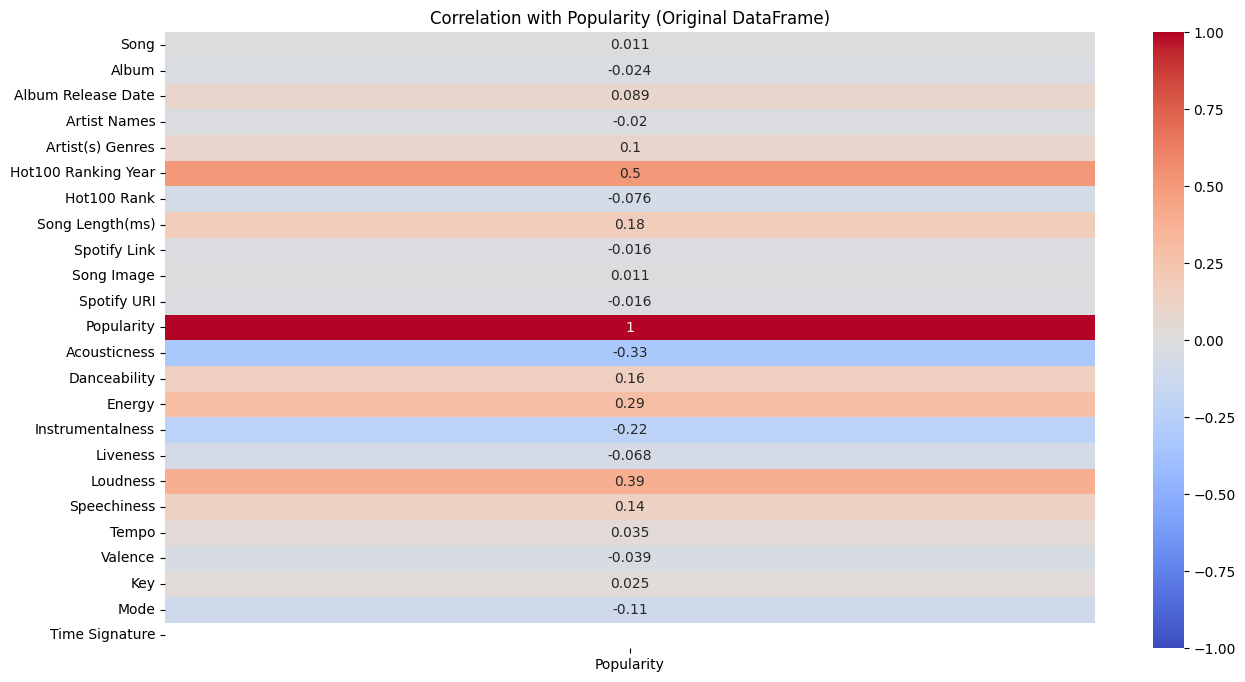

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr()[['Popularity']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Popularity (Original DataFrame)')
plt.show()

In [ ]:
selected_features = ['Acousticness',  'Energy',
             'Song Length(ms)','Album Release Date','Loudness', 'Hot100 Ranking Year','Instrumentalness','Artist(s) Genres']


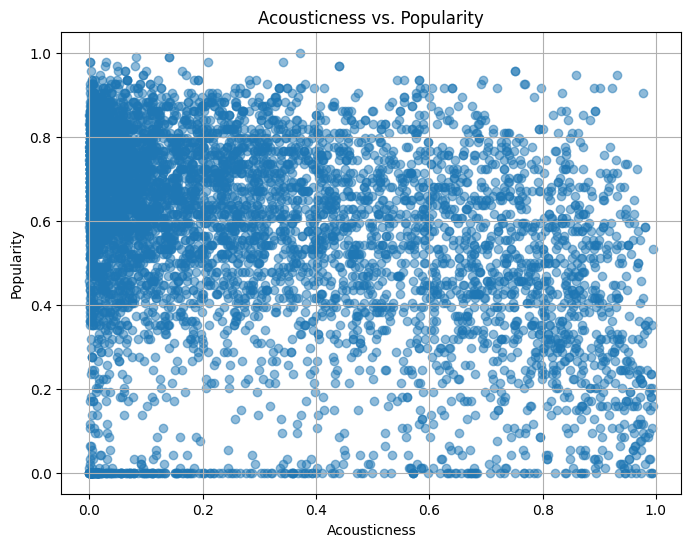

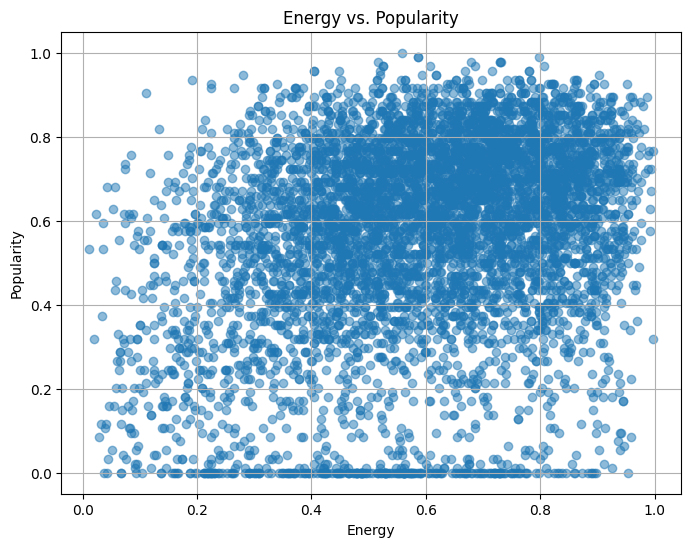

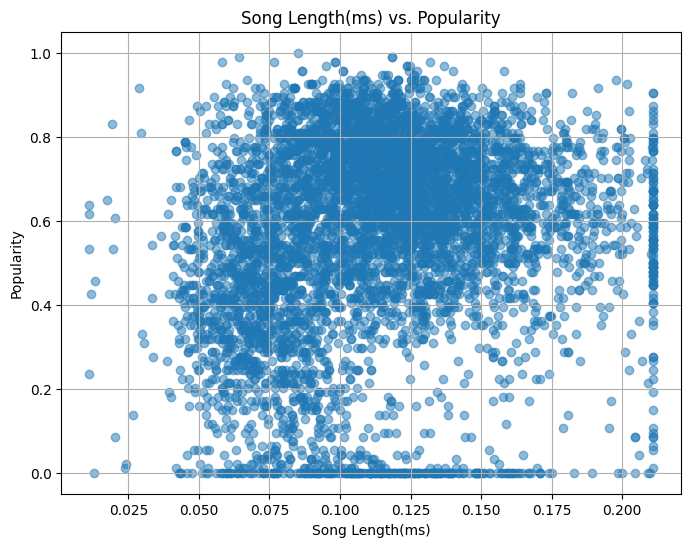

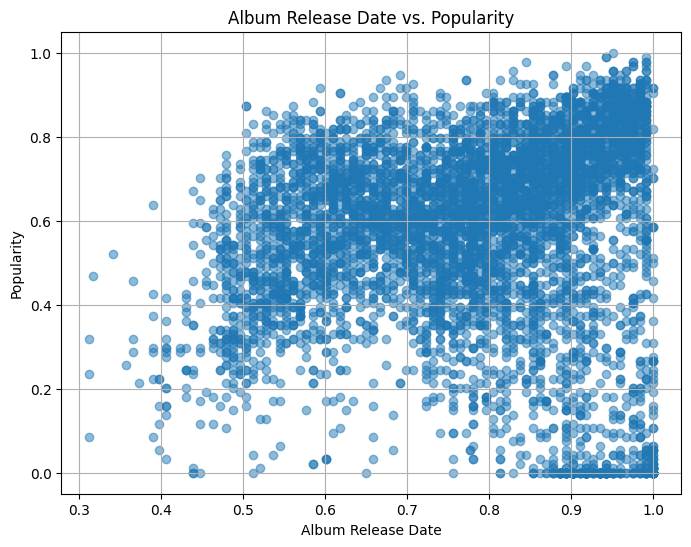

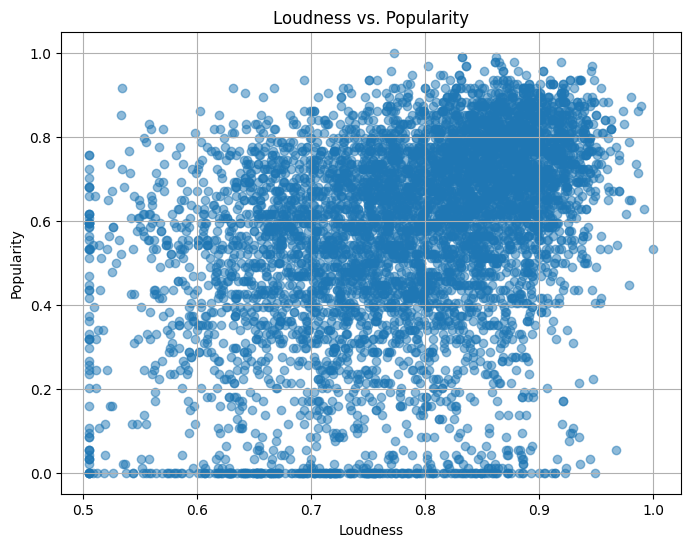

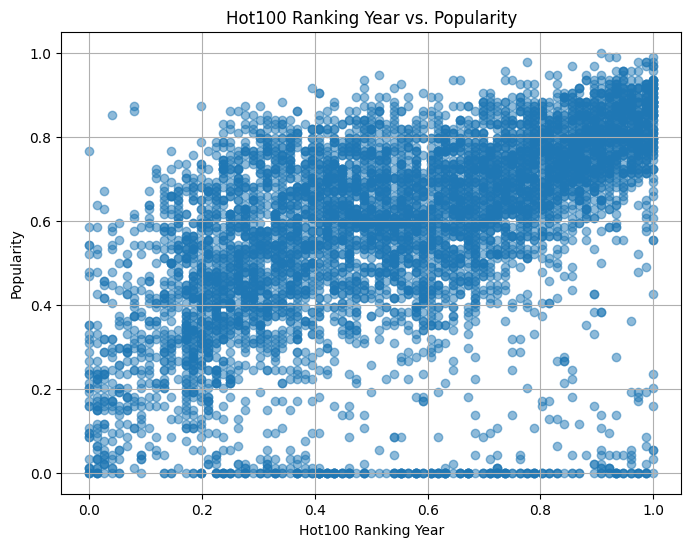

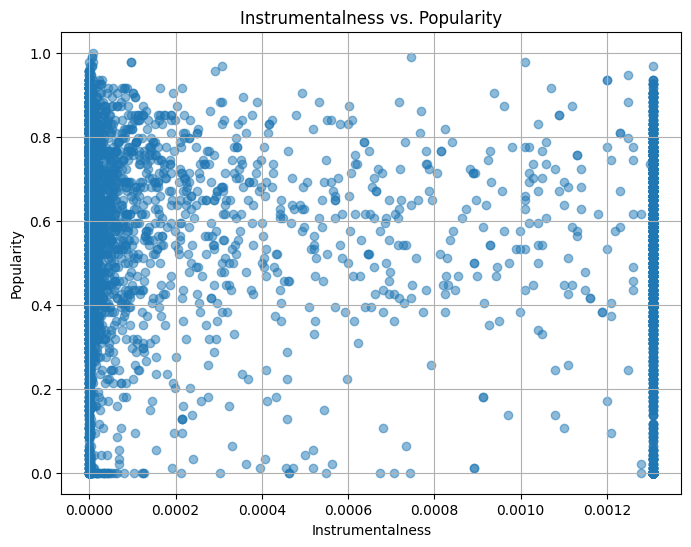

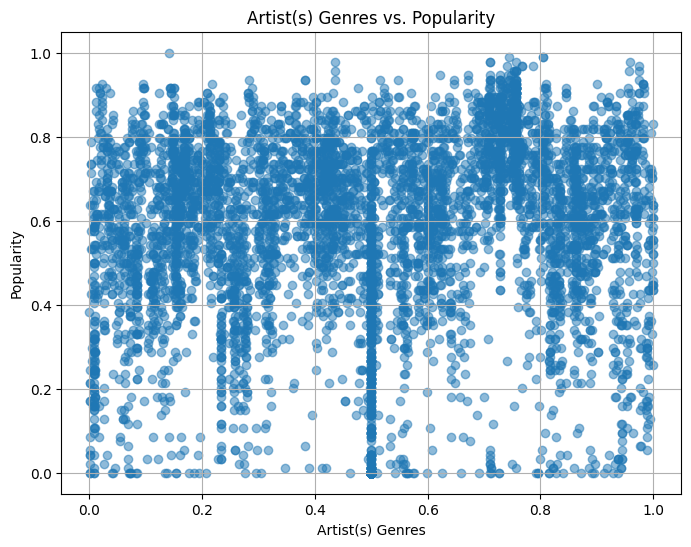

In [ ]:
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Popularity'], alpha=0.5)
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.grid(True)
    plt.show()

In [ ]:
selected_features = ['Acousticness', 'Energy', 'Song Length(ms)', 'Album Release Date',
                     'Loudness', 'Hot100 Ranking Year', 'Instrumentalness', 'Artist(s) Genres']

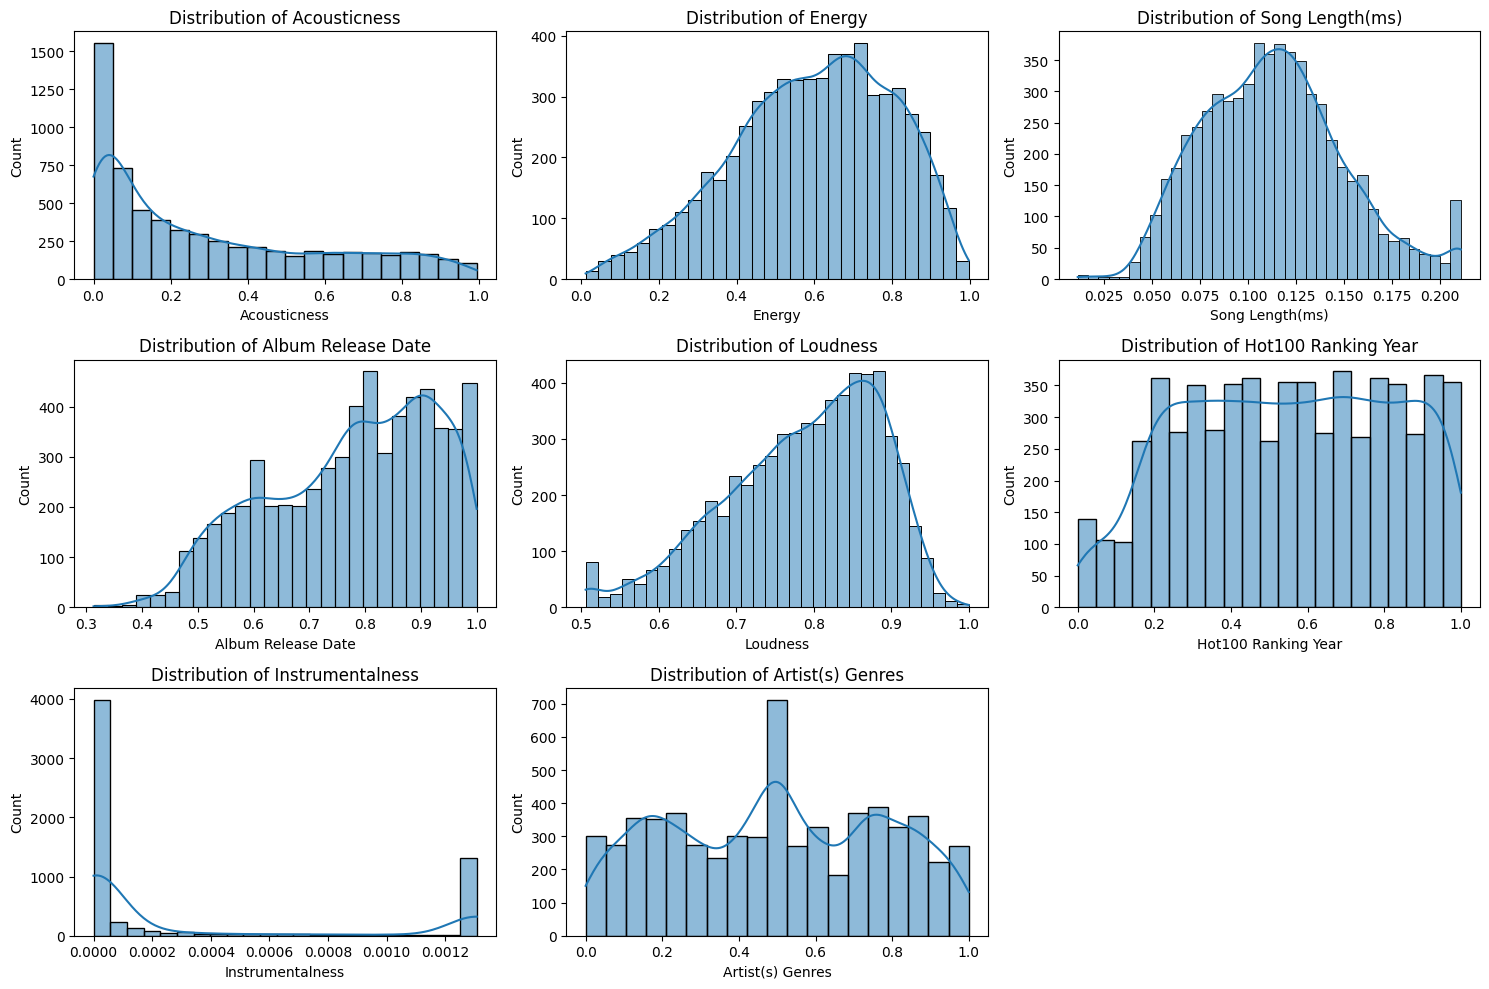

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Split data into features and target
X = df[selected_features]
y = df['Popularity']
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(kernel='poly'),
    'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
}

Model: Linear Regression
Mean Squared Error (Validation): 0.034867936137959646
Mean Squared Error (Test): 0.02925954142862905
R^2 Score: 0.4500889383412706


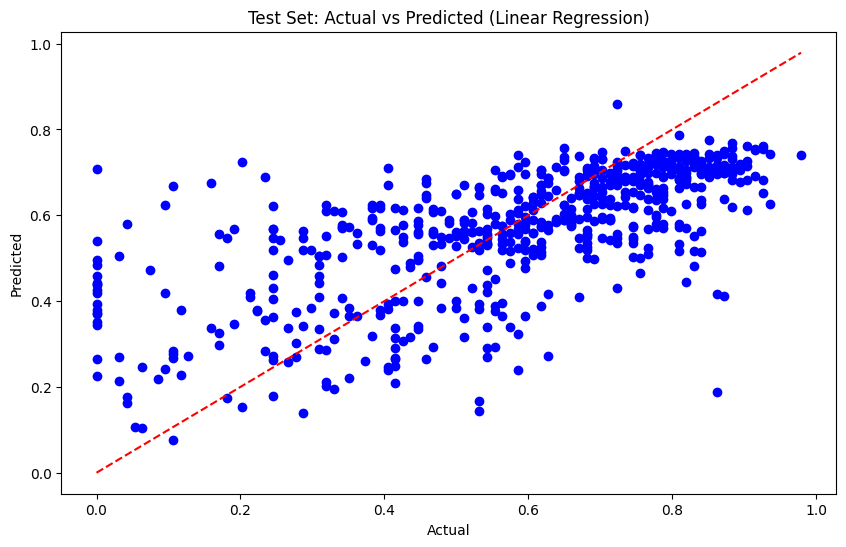

Model: Random Forest
Mean Squared Error (Validation): 0.019906628632609582
Mean Squared Error (Test): 0.020013327297419642
R^2 Score: 0.6238645746279787


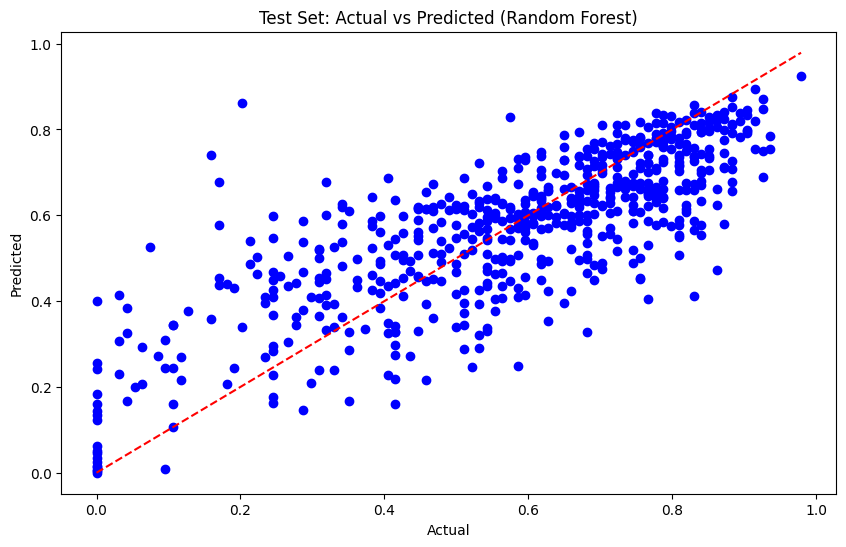

Model: SVR
Mean Squared Error (Validation): 0.030598898294176755
Mean Squared Error (Test): 0.027358796713376606
R^2 Score: 0.4858120048444241


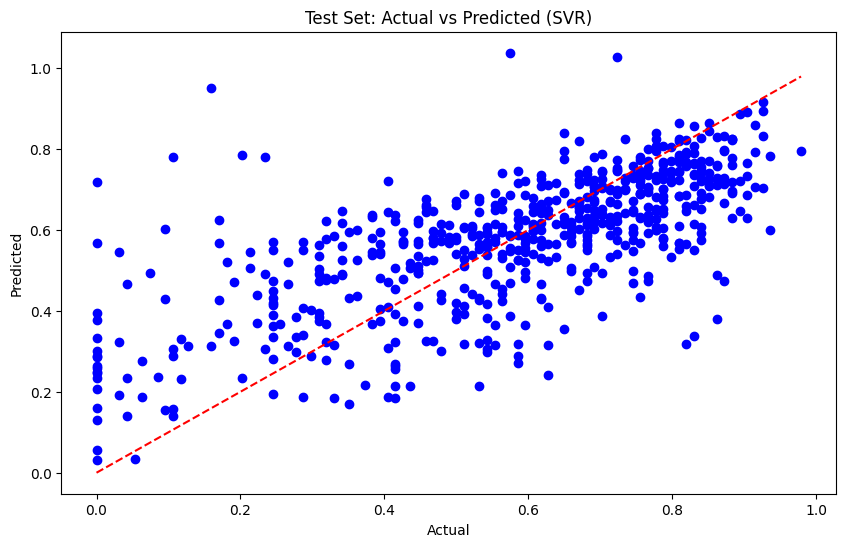

Model: Gradient Boosting
Mean Squared Error (Validation): 0.02041858365907361
Mean Squared Error (Test): 0.02038120620747153
R^2 Score: 0.6169505673636493


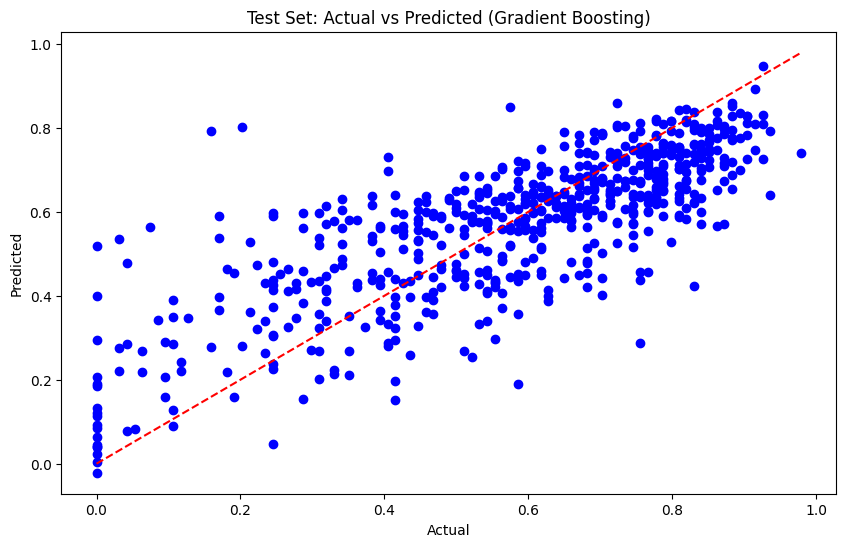

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    print(f"Model: {name}")
    print(f"Mean Squared Error (Validation): {mse_valid}")
    print(f"Mean Squared Error (Test): {mse_test}")
    print(f"R^2 Score: {r2}")
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Test Set: Actual vs Predicted ({name})')
    plt.show()

In [ ]:
import pickle
saved_values = {
    'artist_genres_mode': artist_genres_mode,
    'Upper_lower_bounds': bounds_dict,
    'min_max_values': X_scaled_features_info,
    'encodded_values':encodded_values,
    'Top_features':selected_features,
    'PopMean':PopMean,
    'mode_values':mode_values
}
with open('saved_values.pkl', 'wb') as f:
    pickle.dump(saved_values, f)

In [ ]:
save_dir = '/content/'
for model_name, model in models.items():
    filename = save_dir + model_name.replace(' ', '_') + '_saved.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
with open('saved_values.pkl', 'rb') as f:
    saved_values = pickle.load(f)

In [ ]:
loaded_models = {}
save_dir = '/content/'
for model_name in models.keys():
    filename = save_dir + model_name.replace(' ', '_') + '_saved.pkl'
    with open(filename, 'rb') as file:
        loaded_models[model_name] = pickle.load(file)

In [ ]:
def preprocess_and_fit_models(df, saved_values):
      # Fill missing values
    df['Artist(s) Genres'] = df['Artist(s) Genres'].replace(r'^\[\s*\]$', np.nan, regex=True)
    df['Artist(s) Genres'].fillna(saved_values['artist_genres_mode'], inplace=True)
    year_only_checker = df["Album Release Date"].str.len() == 4
    df.loc[year_only_checker, "Album Release Date"] = "01/01/" + df.loc[year_only_checker, "Album Release Date"]
    df["Album Release Date"] = pd.to_datetime(df["Album Release Date"], errors='coerce')
    df["Album Release Date"] = df["Album Release Date"].dt.year
    df["Album Release Date"].fillna(saved_values['Upper_lower_bounds']['Album Release Date']['mean'], inplace=True)

    # Fill missing values and handle new values
    for column_name in saved_values['Top_features']:

        if df[column_name].isnull().any():
            if column_name in saved_values['mode_values']:  # Check if column is categorical
                # For categorical columns, replace missing or new values with mode
                mode_value = saved_values['mode_values'][column_name]
                df[column_name].fillna(mode_value, inplace=True)
            else:  # If column is numerical
                # For numerical columns, replace missing values with mean
                mean_value = saved_values['Upper_lower_bounds'][column_name]['mean']
                df[column_name].fillna(mean_value, inplace=True)
    for column_name in saved_values['Top_features']:
        if column_name in saved_values['encodded_values']:
            encoding_dict = saved_values['encodded_values'][column_name]
            # Check for values in test data not present in training data
            for value in df[column_name]:
                if value not in encoding_dict:
                    if column_name in saved_values['mode_values']:  # Check if column is categorical
                        # For categorical columns, replace new values with mode
                        mode_value = saved_values['mode_values'][column_name]
                        df[column_name] = df[column_name].replace(value, mode_value)
                    else:  # If column is numerical
                        # For numerical columns, replace new values with mean
                        mean_value = saved_values['Upper_lower_bounds'][column_name]['mean']
                        df[column_name] = df[column_name].replace(value, mean_value)


            # Encode categorical columns
            df[column_name] = df[column_name].map(encoding_dict)


    # Handle outliers
    for column_name in saved_values['Top_features']:
        if column_name in saved_values['Upper_lower_bounds']:
            upper_bound = saved_values['Upper_lower_bounds'][column_name]['upper']
            lower_bound = saved_values['Upper_lower_bounds'][column_name]['lower']
            mean_value = saved_values['Upper_lower_bounds'][column_name]['mean']
            df[column_name] = np.where((df[column_name] > upper_bound) | (df[column_name] < lower_bound), mean_value, df[column_name])

    # Scale features
    for column_name in saved_values['Top_features']:
        if column_name in saved_values['min_max_values']:
            min_value = saved_values['min_max_values'][column_name]['min']
            max_value = saved_values['min_max_values'][column_name]['max']
            df[column_name] = (df[column_name] - min_value) / (max_value - min_value)
    if 'Popularity' in saved_values['min_max_values']:
      min_value = saved_values['min_max_values']['Popularity']['min']
      max_value = saved_values['min_max_values']['Popularity']['max']
      df['Popularity'] = (df['Popularity'] - min_value) / (max_value - min_value)


    # split the df
    X = df[saved_values['Top_features']]
    y = df['Popularity']

    return X, y


In [ ]:
test_df = pd.read_csv('/content/SongPopularity_reg_test.csv')

In [ ]:
X_test, y = preprocess_and_fit_models(test_df, saved_values)

In [ ]:
y.head()

0    0.755319
1    0.000000
2    0.000000
3    0.776596
4    0.585106
Name: Popularity, dtype: float64

In [ ]:
predictions = {}
for model_name, model in loaded_models.items():
    predictions[model_name] = model.predict(X_test)

In [ ]:
for model_name, model_preds in predictions.items():
    true_values = y
    r2 = r2_score(true_values, model_preds)
    mse = mean_squared_error(true_values, model_preds)
    print(f"Model: {model_name}")
    print(f"R-squared: {r2}")
    print(f"MSE: {mse}")
    print()

Model: Linear Regression
R-squared: -407.56831750210347
MSE: 19.228084120435543

Model: Random Forest
R-squared: -0.9853223127576756
MSE: 0.0934334425862223

Model: SVR
R-squared: -1467424415.4091687
MSE: 69060078.5973848

Model: Gradient Boosting
R-squared: -0.11899563368372945
MSE: 0.05266228743926052

